In [3]:
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentation

  Using cached labelme-5.2.0.post4.tar.gz (1.5 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


ERROR: Could not find a version that satisfies the requirement albumentation (from versions: none)
ERROR: No matching distribution found for albumentation


In [1]:
import os
import time
import uuid
import cv2

ModuleNotFoundError: No module named 'cv2'

In [5]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [6]:
# cap = cv2.VideoCapture(1)
# for imgnum in range(number_images):
#     print('Collecting image {}'.format(imgnum))
#     ret, frame = cap.read()
#     imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
#     cv2.imwrite(imgname, frame)
#     cv2.imshow('frame', frame)
#     time.sleep(0.5)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         breakF
# cap.release()
# cv2.destroyAllWindows()

In [7]:
#labelme


In [8]:
import tensorflow as tf
import json #our labels are in json format so we are importing this
import numpy as np
from matplotlib import pyplot as plt 

In [9]:
#limit gpu memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [10]:
# images = tf.data.Dataset.list_files('data\\images\\*.jpg')
# images.as_numpy_iterator().next()
def load_image(x): #x is the file path above 
    byte_img = tf.io.read_file(x) # take in the file pathread which will return a byte encoded image 
    img = tf.io.decode_jpeg(byte_img) 
    return img 

In [11]:
# images = images.map(load_image) #applies map function which is 'load image' in our case 
# images.as_numpy_iterator().next()
# type(images) # checking for mapped dataset

In [12]:
# image_generator = images.batch(4).as_numpy_iterator() # batching it in 4 , helps us loop through 
# plot_images = image_generator.next()  # to get next batch
# try:
#     fig, ax = plt.subplots(ncols=4, figsize=(20,20))
#     for idx, image in enumerate(plot_images):
#         ax[idx].imshow(image) 
#     plt.show()
# except Exception as e:
#     print(e)



In [13]:
## Partition Unaugmented Data
#84 TRAIN+ 18test+18val 
#move the matching labels 
for folder in ['train','test','val']:    # loops through these folders 
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

In [14]:
#apply image augmentation 
import albumentations as alb
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), #we are gonna cut those pics into these dimensions
                         alb.HorizontalFlip(p=0.5), #
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', # specifying our boundingbox parameter
                                                  label_fields=['class_labels']))# pascal_voc,albumentation,coco,yolo ((options))

In [15]:
#lOAD A TEST IMAGE AND ANNOTATION WITH OPENCV AND JSON
img = cv2.imread(os.path.join('data','train', 'images','5bdd52c1-d315-11ed-8f20-70cf494af0e6.jpg'))



In [16]:
with open(os.path.join('data', 'train', 'labels', '5bdd52c1-d315-11ed-8f20-70cf494af0e6.json'), 'r') as f:
    label = json.load(f)

In [17]:
label['shapes'][0]['points']

[[355.78199052132703, 62.27488151658767],
 [547.2511848341233, 314.4075829383886]]

In [18]:
#Extract Coordinates and Rescale to Match Image Resolution
coords = [0,0,0,0] #its going to store them exactly in the coordinate array 
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1] 

In [19]:
coords #transformed into a single vector 


[355.78199052132703, 62.27488151658767, 547.2511848341233, 314.4075829383886]

In [20]:
coords = list(np.divide(coords, [640,480,640,480]))

In [21]:
coords

[0.5559093601895735, 0.129739336492891, 0.8550799763033176, 0.6550157977883095]

In [22]:
#Apply Augmentations and View Results
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])


In [23]:
augmented

{'image': array([[[195, 196, 187],
         [191, 192, 183],
         [188, 189, 185],
         ...,
         [207, 208, 192],
         [208, 209, 193],
         [208, 209, 193]],
 
        [[196, 197, 188],
         [189, 190, 181],
         [187, 188, 184],
         ...,
         [208, 209, 193],
         [209, 210, 194],
         [209, 210, 194]],
 
        [[197, 198, 189],
         [189, 190, 181],
         [186, 187, 183],
         ...,
         [208, 209, 193],
         [209, 210, 194],
         [209, 210, 194]],
 
        ...,
 
        [[133, 169, 209],
         [108, 145, 183],
         [100, 138, 173],
         ...,
         [ 61,  94, 150],
         [ 62,  91, 148],
         [ 65,  94, 151]],
 
        [[148, 187, 231],
         [132, 170, 212],
         [119, 158, 197],
         ...,
         [ 56,  92, 146],
         [ 64,  95, 150],
         [ 62,  92, 147]],
 
        [[125, 171, 218],
         [135, 180, 224],
         [138, 180, 223],
         ...,
         [ 66, 106,

In [24]:
augmented['bboxes'][0][2:]

(0.8072248551869405, 0.6786835176408635)

In [25]:
augmented['bboxes']


[(0.3817377567140601,
  0.11838862559241706,
  0.8072248551869405,
  0.6786835176408635)]

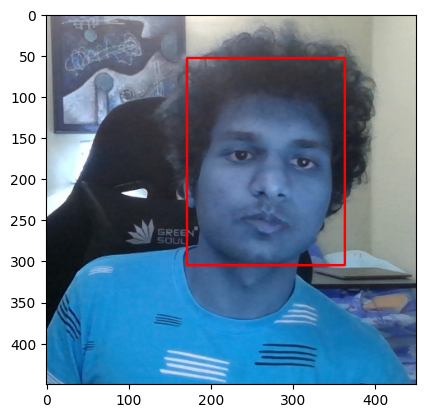

In [26]:
#this part will help us visualize 
cv2.rectangle(augmented['image'], # draws a rectangle 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)), #
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [27]:
for partition in ['train','test','val']: #we are going to loop through are train,test and val dataset folders
    for image in os.listdir(os.path.join('data', partition, 'images')):  
        img = cv2.imread(os.path.join('data', partition, 'images', image)) #these two lines are used to grab  every single image 

        coords = [0,0,0.00001,0.00001] #default annotation set for images without any head present in them 
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path): #then we check if there's any annotation that exists for that image
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]  #extracting our coordinates from a set of tensors to a straight vector
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60): #creating 60 augmented images per base image
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face']) #augmenting our image  
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])
                  #  writing down our augmented images into a folder called aug_data
                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.683279028436019, 0.6125592417061612, 0.3285693127962085, 0.19391785150078986, 'face'].
x_max is less than or equal to x_min for bbox [0.1900918246445497, 0.8485387045813586, -2.2204460492503132e-17, 0.2858843232737796, 'face'].
x_max is less than or equal to x_min for bbox [0.20119964454976297, 0.8742101105845183, 0.0, 0.3072152636726097, 'face'].
x_max is less than or equal to x_min for bbox [0.6906842417061612, 0.6451421800947867, 0.4152103080568721, 0.14751184834123218, 'face'].
x_max is less than or equal to x_min for bbox [0.7662174170616114, 0.6737756714060033, 0.4433501184834124, 0.11986571879936808, 'face'].
x_max is less than or equal to x_min for bbox [0.8336048578199053, 0.7063586097946287, 0.513699644549763, 0.1267772511848341, 'face'].
x_max is less than or equal to x_min for bbox [0.6403287914691943, 0.6540284360189574, 0.32486670616113744, 0.14751184834123218, 'face'].
x_max is less than or equal to x_min for bbox [0.71956

In [28]:
#load augmented images to Tensorflow Dataset  
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False) # takes data from our aug_data folder 
train_images = train_images.map(load_image) #used to load image up 
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120))) #resizing our image 120pixelsx120pixels to make more efficient NN
train_images = train_images.map(lambda x: x/255) #dividing it by 255(scaling it) so our values fall b/w 0&1 to apply sigmoid function to NN

In [29]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [30]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [31]:
train_images.as_numpy_iterator().next()

array([[[0.30735293, 0.32120097, 0.26721814],
        [0.3067402 , 0.3230392 , 0.26813725],
        [0.2923407 , 0.3158701 , 0.2658701 ],
        ...,
        [0.6745098 , 0.43137255, 0.04313726],
        [0.66930145, 0.4261642 , 0.03498774],
        [0.6691176 , 0.42542893, 0.02640931]],

       [[0.30802697, 0.3158701 , 0.26488972],
        [0.2990196 , 0.31470588, 0.25980392],
        [0.31023285, 0.32591912, 0.27101716],
        ...,
        [0.6813725 , 0.43823528, 0.04901961],
        [0.67493874, 0.43180147, 0.02886029],
        [0.69626224, 0.45704657, 0.03890931]],

       [[0.30067402, 0.30851716, 0.25753677],
        [0.30594364, 0.3216299 , 0.26672795],
        [0.31023285, 0.32591912, 0.27101716],
        ...,
        [0.68192405, 0.43180147, 0.03921569],
        [0.6775735 , 0.44601715, 0.04607843],
        [0.6856005 , 0.45588234, 0.04705882]],

       ...,

       [[0.3569853 , 0.33596814, 0.30147058],
        [0.65367645, 0.61838233, 0.5917892 ],
        [0.68694854, 0

In [32]:
#PREPARE LABELS
def load_labels(label_path): #
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f: #grabbing our lable using .numpy()
        label = json.load(f)
        
    return [label['class']], label['bbox'] #extract the class and the bounding box

In [33]:
#Load Labels to Tensorflow Dataset

train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False) #we are loading our json objects 
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16])) #using lamda function to loop through each image  

In [34]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [35]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [36]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.4243, 0.2827, 0.926 , 0.787 ], dtype=float16))

In [37]:
##COMBINE lABEL AND IMAGES SAMPLES

In [38]:
#CHECK PARTITION LENGTHS
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(4380, 4380, 960, 960, 780, 780)

In [39]:
##CREATE FINAL DATASETS(IMAGE/LABELS)
train = tf.data.Dataset.zip((train_images, train_labels)) #COMBINING example with image datasets using zip method 
train = train.shuffle(3000) 
train = train.batch(8) #a batch of 8images and 8 labels
train = train.prefetch(4) #helps eliminate bottlenecks 

In [40]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [41]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [42]:
train.as_numpy_iterator().next()[0].shape 

(8, 120, 120, 3)

In [43]:
##view images and  annotations 

In [44]:
data_samples = train.as_numpy_iterator() 

In [45]:
res = data_samples.next() 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


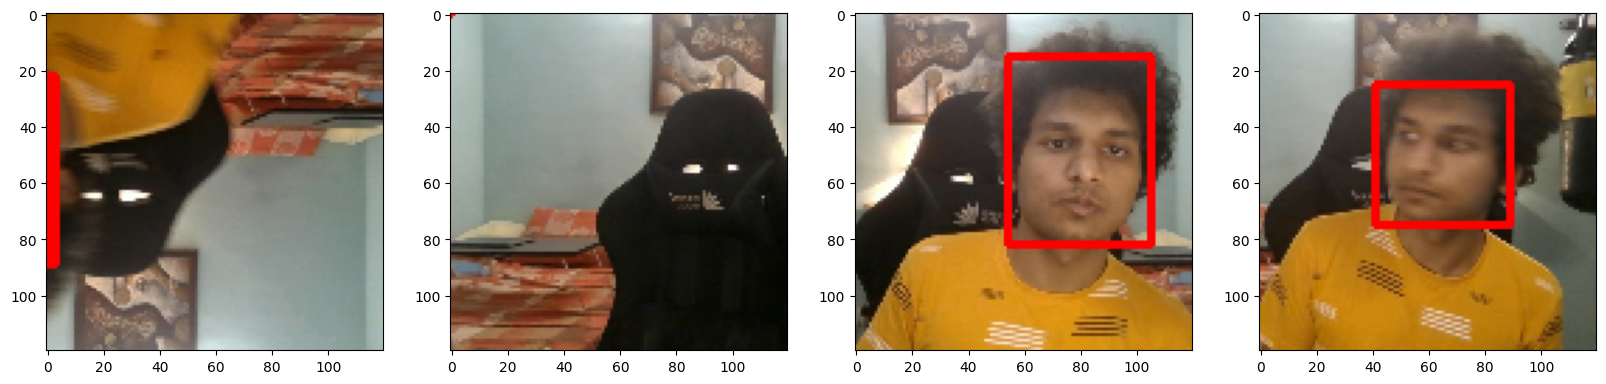

In [46]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20)) #using matplotlib, subplot
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, #drawing a rectangle using opencv
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image) #to visualize 

In [47]:
##BUILD DEEP LEARNING USING THE FUNCTIONAL API

In [48]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16 

In [49]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16 

In [50]:
vgg = VGG16(include_top=False) #creating an instance of vgg (using ssd model) 

In [51]:
vgg.summary() #

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [52]:
##Build instance of Network 
def build_model(): 
    input_layer = Input(shape=(120,120,3)) #specifying our input layer,using input class,shape 120x120x3pixels
    
    vgg = VGG16(include_top=False)(input_layer) #creating the layer ,telling what we are going to pass through the layer from iL 

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg) # condensing and giving only large values ,stored in f1
    class1 = Dense(2048, activation='relu')(f1) 
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model (regression)
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1) #sigmoid function 
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2]) #outpu > classification and regression output
    return facetracker

## in otherwords our input goes through classification model and those outputs get broken down into classification
##cont.> and bounding box model 

In [53]:
##Test out Neural Network

In [54]:
facetracker = build_model()

In [55]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [56]:
X, y = train.as_numpy_iterator().next() #x-images, y -labels 

In [57]:
X.shape 


(8, 120, 120, 3)

In [58]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 10s 10s/step


In [59]:
classes, coords

(array([[0.4050338 ],
        [0.31097883],
        [0.26939777],
        [0.3426423 ],
        [0.31003147],
        [0.29301044],
        [0.32229206],
        [0.2985433 ]], dtype=float32),
 array([[0.6615657 , 0.4594095 , 0.46366805, 0.33733737],
        [0.62839186, 0.55525744, 0.39457732, 0.35214895],
        [0.5967847 , 0.5888663 , 0.4584204 , 0.42925397],
        [0.6553769 , 0.55958956, 0.40480894, 0.3568068 ],
        [0.67516327, 0.54872173, 0.49295428, 0.3702319 ],
        [0.63566285, 0.56599414, 0.4777375 , 0.35721394],
        [0.66386443, 0.50620645, 0.5336364 , 0.38946366],
        [0.6639157 , 0.50019264, 0.49511895, 0.36872053]], dtype=float32))

In [60]:
## Define Losses and Optimizers

In [61]:
# Define Optimizer and LR
batches_per_epoch = len(train) #548
lr_decay = (1./0.75 -1)/batches_per_epoch # specify what are learning rate decay is going to be. We slow down the learning rate
#cont.> so we dont overfit.

In [62]:
####opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay = lr_decay)
#0.000608272506082725, our optimizer , hit will identify how to  appy  gradients and apply backprop. (we are using Adam optimizer)
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=0.1)

In [63]:
#Create Localization Loss and Classification Loss
def localization_loss(y_true, yhat):            #(x1-x2)^2+(y1-y2)^2   
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2])) # getting distance between actual and predicted coordinates
    #diff b/w coordinates is stored in delta_coord              
    h_true = y_true[:,3] - y_true[:,1]  #actual height
    w_true = y_true[:,2] - y_true[:,0] #actual width

    h_pred = yhat[:,3] - yhat[:,1] #predicted height
    w_pred = yhat[:,2] - yhat[:,0] #predicted width
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred)) #dist b/w true and predicted valiues 
    #deta_coord +delt_size
    return delta_coord + delta_size

In [64]:
classloss = tf.keras.losses.BinaryCrossentropy() #classification loss is going to be passed on to our training pipeline 
regressloss = localization_loss 

In [65]:
#Test out Loss Metrics 
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=8.67887>

In [66]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=8.67887>

In [67]:
#Train Neural Network
class FaceTracker(Model): #passing our model through our base class
    def __init__(self, eyetracker,  **kwargs): #init method lets us pass our parameters 
        super().__init__(**kwargs) #passing it through our init method
        self.model = eyetracker #setting that self.model

    def compile(self, opt, classloss, localizationloss, **kwargs): #compiling it ,possing it through our optimizer 
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    ##actual training of our NN
    def train_step(self, batch, **kwargs): #trainstep is going to take one batch of data and train it
        
        X, y = batch #take that data and unpack it into it's  X and y values 
        
        with tf.GradientTape() as tape: #tell keras to calculate each function that is being applied to this info
            classes, coords = self.model(X, training=True) #we make a prediction from our model,taking our facetracker_model 
            #passing through our X values(preprocessed images) | model returns classes and coordinates 
            batch_classloss = self.closs(y[0], classes) 
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords) #
            
            total_loss = batch_localizationloss+0.5*batch_classloss #add above both losses 
            
            grad = tape.gradient(total_loss, self.model.trainable_variables) #gradient, bassing gradient wrt our loss function
        # applying gradient decent
        opt.apply_gradients(zip(grad, self.model.trainable_variables)) #back prop
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [68]:
model = FaceTracker(facetracker)

In [69]:
model.compile(opt, classloss, regressloss)

In [70]:
#train
logdir='logs'

In [71]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [72]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback]) #calling our "model"
#passing our model, for 60epochs. passing val data

Epoch 1/50
548/548 [==============================] - 79s 120ms/step - total_loss: 0.3959 - class_loss: 0.1057 - regress_loss: 0.3430 - val_total_loss: 0.0386 - val_class_loss: 0.0057 - val_regress_loss: 0.0357
Epoch 2/50
548/548 [==============================] - 56s 92ms/step - total_loss: 0.1368 - class_loss: 0.0307 - regress_loss: 0.1214 - val_total_loss: 0.0461 - val_class_loss: 2.5641e-04 - val_regress_loss: 0.0459
Epoch 3/50
548/548 [==============================] - 56s 92ms/step - total_loss: 0.1133 - class_loss: 0.0259 - regress_loss: 0.1004 - val_total_loss: 0.0374 - val_class_loss: 0.0026 - val_regress_loss: 0.0361
Epoch 4/50
548/548 [==============================] - 56s 93ms/step - total_loss: 0.1001 - class_loss: 0.0226 - regress_loss: 0.0888 - val_total_loss: 0.0192 - val_class_loss: 0.0013 - val_regress_loss: 0.0186
Epoch 5/50
548/548 [==============================] - 56s 92ms/step - total_loss: 0.0925 - class_loss: 0.0212 - regress_loss: 0.0819 - val_total_loss: 0.06

In [73]:
#Plot Performance 
hist.history


{'total_loss': [0.02211943455040455,
  0.055346064269542694,
  0.47436702251434326,
  0.015682367607951164,
  0.06672176718711853,
  0.009543152526021004,
  0.019673729315400124,
  0.03186908736824989,
  0.012395954690873623,
  0.011752801015973091,
  0.01168183982372284,
  0.007204153575003147,
  0.03016308881342411,
  0.0053417617455124855,
  0.007821322418749332,
  0.01745881885290146,
  0.04003182426095009,
  0.010444365441799164,
  0.04649321734905243,
  0.005700793582946062,
  0.01370028592646122,
  0.021039186045527458,
  0.01624840684235096,
  0.023185668513178825,
  0.008769409731030464,
  0.32133370637893677,
  0.0097296591848135,
  0.008794578723609447,
  0.016742384061217308,
  0.012143675237894058,
  0.007783175446093082,
  0.010379710234701633,
  0.051084235310554504,
  0.010923300869762897,
  0.005080607254058123,
  0.008862199261784554,
  0.011793667450547218,
  0.014754531905055046,
  0.014324143528938293,
  0.015268845483660698,
  0.009639302268624306,
  0.01403767056

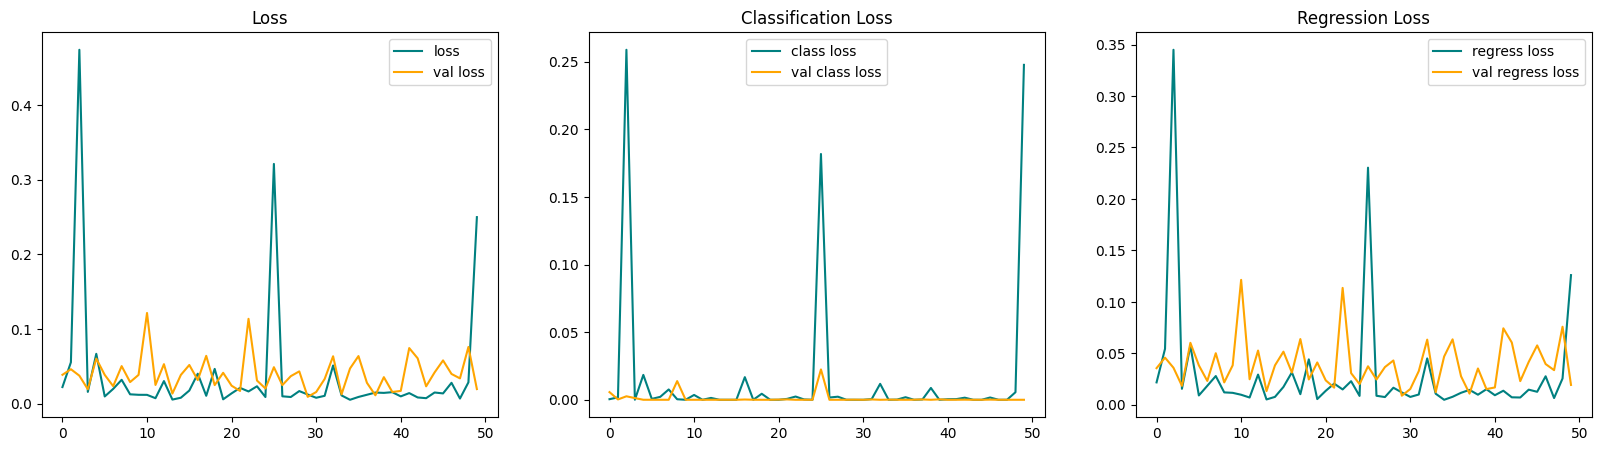

In [74]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [3]:
#MAKE PREDICTION
test_data = test.as_numpy_iterator()

In [2]:
test_sample = test_data.next()

NameError: name 'test_data' is not defined

In [77]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 42ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


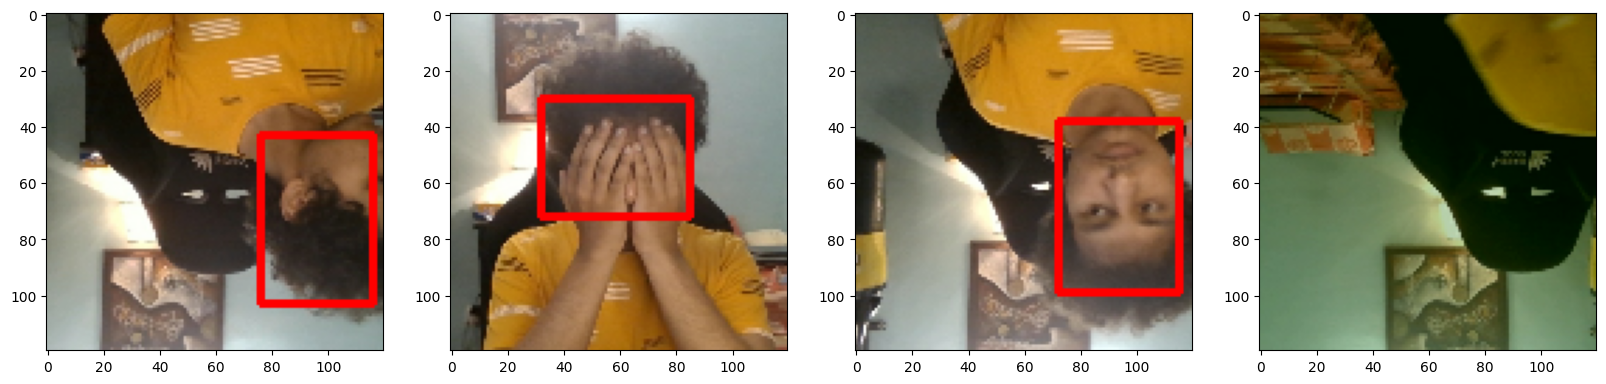

In [78]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [79]:
#Save the Model
from tensorflow.keras.models import load_model

In [80]:
facetracker.save('facetracker.h5')

In [81]:
facetracker = load_model('facetracker.h5')

In [82]:

cap = cv2.VideoCapture(1)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 37ms/step


In [ ]:
# cap = cv2.VideoCapture(1)
# if not cap.isOpened():
#     print("Failed to open video capture")
#     # Add error handling code here
#     sys.exit(1)  # Exit the program with an error code if needed
